In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy.io
from filtered_point_process.PointProcess import PointProcessModel
from filtered_point_process.FPP import FilteredPointProcess
from matplotlib.gridspec import GridSpec

In [3]:
# Load the .mat file
mat_file_path = ".../filtered-point-process/filtered_point_process/Notebooks/Figure_Code_Bloniasz_et_al_2024/Figure_A_blue.mat"
data = scipy.io.loadmat(mat_file_path)


print(
    data.keys()
)  #'Spectrogram (Original)', 'Spectrogram (log-transformed)', 'Awake PSD', 'Anes PSD', 'time', 'frequencies'], # fs = 1000, frequencies (14999,), Anes PSD (14999,)

dict_keys(['__header__', '__version__', '__globals__', 'Spectrogram (Original)', 'Spectrogram (log-transformed)', 'Awake PSD', 'Anes PSD', 'time', 'frequencies', 'timestamps_labels', 'Spectrogram of Suspected Artifact (Original)'])


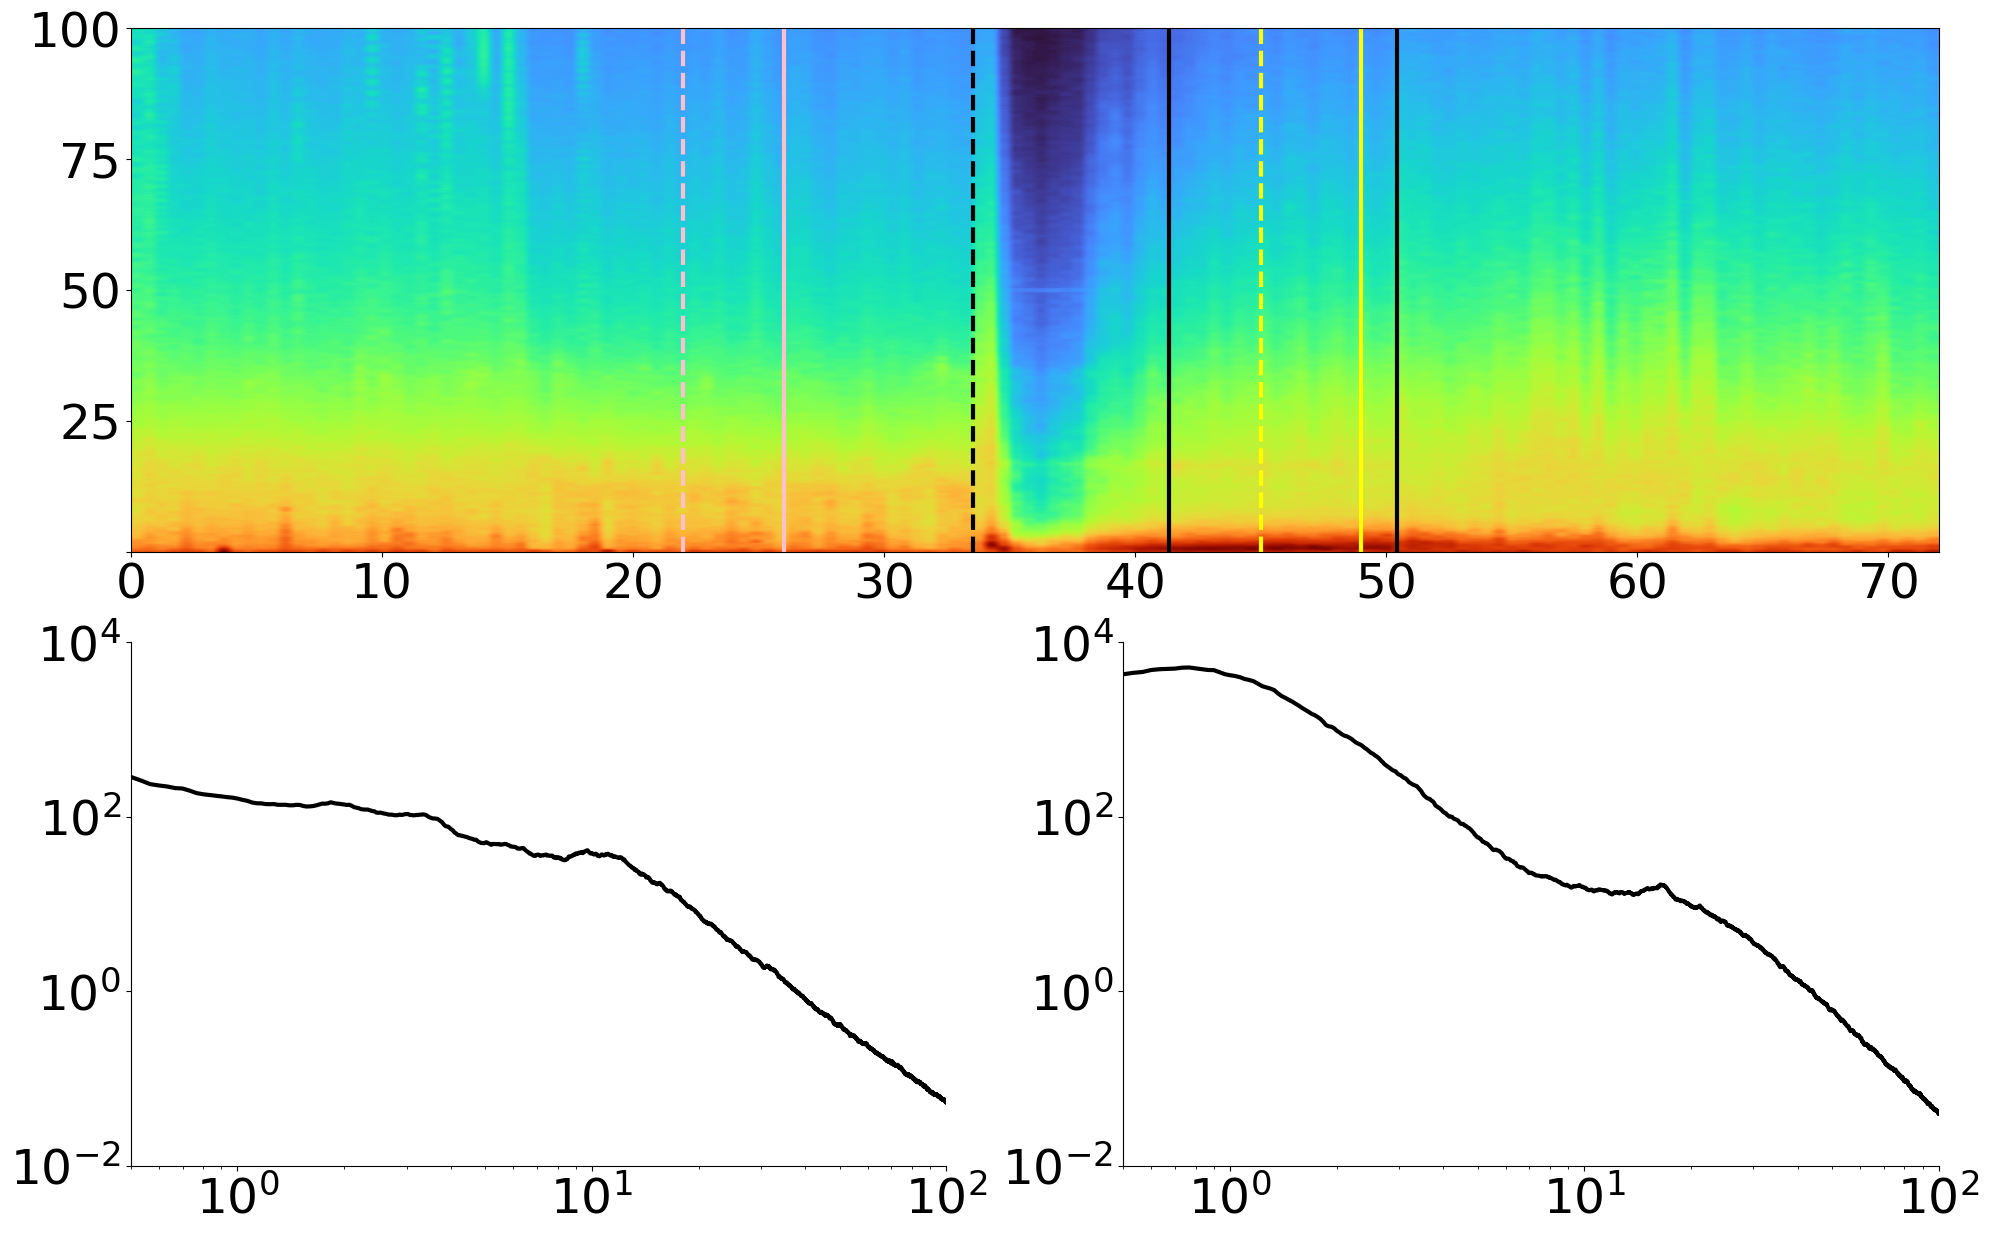

In [10]:
spectrogram_log = data["Spectrogram (log-transformed)"]
spectrogram_linear = data["Spectrogram (Original)"]
frequencies = data["frequencies"].squeeze()
time = data["time"].squeeze()
awake_psd = data["Awake PSD"].squeeze()
anes_psd = data["Anes PSD"].squeeze()
timestamps_labels = data["timestamps_labels"]

# Extract timestamp values
awake_psd_start = timestamps_labels["awake PSD start"][0][0][0]
awake_psd_end = timestamps_labels["awake PSD end"][0][0][0]
anes_psd_start = timestamps_labels["anes PSD start"][0][0][0]
anes_psd_end = timestamps_labels["anes PSD end"][0][0][0]
propofol_injection = timestamps_labels["Propofol Injection"][0][0][0]
anesthesia_start = timestamps_labels["Anesthesia Start"][0][0][0]
anesthesia_end = timestamps_labels["Anesthesia End"][0][0][0]

# Filter by time (See original paper)
time_filter = (time >= 0) & (time <= 72)
filtered_time = time[time_filter]
filtered_spectrogram_log = spectrogram_linear[:, time_filter]

fig = plt.figure(figsize=(20, 18))

ax1 = fig.add_subplot(3, 1, 1)
im = ax1.imshow(
    np.log10(filtered_spectrogram_log),
    aspect="auto",
    origin="lower",
    extent=[
        filtered_time.min(),
        filtered_time.max(),
        frequencies.min(),
        frequencies.max(),
    ],
    cmap="turbo",
)
ax1.tick_params(axis="both", which="major", labelsize=35)

ax1.axvline(
    x=awake_psd_start,
    color="pink",
    linestyle="--",
    linewidth=3,
    label="Awake PSD start",
)
ax1.axvline(
    x=awake_psd_end, color="pink", linestyle="-", linewidth=3, label="Awake PSD end"
)
ax1.axvline(
    x=anes_psd_start,
    color="yellow",
    linestyle="--",
    linewidth=3,
    label="Anes PSD start",
)
ax1.axvline(
    x=anes_psd_end, color="yellow", linestyle="-", linewidth=3, label="Anes PSD end"
)
ax1.axvline(
    x=propofol_injection,
    color="black",
    linestyle="--",
    linewidth=3,
    label="Propofol Injection",
)
ax1.axvline(
    x=anesthesia_start,
    color="black",
    linestyle="-",
    linewidth=3,
    label="Anesthesia Start",
)
ax1.axvline(
    x=anesthesia_end, color="black", linestyle="-", linewidth=3, label="Anesthesia End"
)

ax1.set_yticks(ax1.get_yticks())
y_labels = ax1.get_yticks().astype(int)
y_labels_str = [str(label) for label in y_labels]
y_labels_str[0] = ""  # Remove the 0 label from the y-axis
ax1.set_yticklabels(y_labels_str)


ax2 = fig.add_subplot(3, 2, 4)
ax2.loglog(frequencies, anes_psd, label="Anes PSD", color="black", linewidth=3)
ax2.set_xlim([0.5, 100])
ax2.set_ylim(1e-2, 1e4)
ax2.tick_params(axis="both", which="major", labelsize=35)

# Remove the top and right lines
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

ax3 = fig.add_subplot(3, 2, 3, sharey=ax2)
ax3.loglog(frequencies, awake_psd, label="Awake PSD", color="black", linewidth=3)
ax3.set_xlim([0.5, 100])
ax3.set_ylim(1e-2, 1e4)
ax3.tick_params(axis="both", which="major", labelsize=35)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)


plt.tight_layout()

plt.show()